**Check Python version. This notebook is implemented for Python 2.7.x. Not all cells may work in other versions of Python.**

In [1]:
import platform
print(platform.python_version())

3.5.4


In [2]:
# The code was removed by DSX for sharing.

,ID,CHURN
0,1,T
1,6,F
2,8,F
3,11,F
4,14,F


In [3]:

body1 = client_cf5e98bbd17f43188c53308a991220c2.get_object(Bucket='2018faststartdsxsample5794a984509e48659bb844a65cd45ed0',Key='customer.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body1, "__iter__"): body1.__iter__ = types.MethodType( __iter__, body1 )

customer = pd.read_csv(body1)
customer.head()

,ID,Gender,Status,Children,Est Income,Car Owner,Age,LongDistance,International,Local,Dropped,Paymethod,LocalBilltype,LongDistanceBilltype,Usage,RatePlan
0,1,F,S,1.0,38000.00,N,24.393333,23.56,0.0,206.08,0.0,CC,Budget,Intnl_discount,229.64,3.0
1,6,M,M,2.0,29616.00,N,49.426667,29.78,0.0,45.50,0.0,CH,FreeLocal,Standard,75.29,2.0
2,8,M,M,0.0,19732.80,N,50.673333,24.81,0.0,22.44,0.0,CC,FreeLocal,Standard,47.25,3.0
3,11,M,S,2.0,96.33,N,56.473333,26.13,0.0,32.88,1.0,CC,Budget,Standard,59.01,1.0
4,14,F,M,2.0,52004.80,N,25.140000,5.03,0.0,23.11,0.0,CH,Budget,Intnl_discount,28.14,1.0


In [4]:
data=customer.join(churn, on=None, how='left', lsuffix='_customer', rsuffix='_churn', sort=False)
data.head()
#data=customer.join(churn,customer['ID']==churn['ID']).select(customer['*'],churn['CHURN'])

#data=customer.join(customer_churn,customer['ID']==customer_churn['ID']).select(customer['*'],customer_churn['CHURN'])

,ID_customer,Gender,Status,Children,Est Income,Car Owner,Age,LongDistance,International,Local,Dropped,Paymethod,LocalBilltype,LongDistanceBilltype,Usage,RatePlan,ID_churn,CHURN
0,1,F,S,1.0,38000.00,N,24.393333,23.56,0.0,206.08,0.0,CC,Budget,Intnl_discount,229.64,3.0,1,T
1,6,M,M,2.0,29616.00,N,49.426667,29.78,0.0,45.50,0.0,CH,FreeLocal,Standard,75.29,2.0,6,F
2,8,M,M,0.0,19732.80,N,50.673333,24.81,0.0,22.44,0.0,CC,FreeLocal,Standard,47.25,3.0,8,F
3,11,M,S,2.0,96.33,N,56.473333,26.13,0.0,32.88,1.0,CC,Budget,Standard,59.01,1.0,11,F
4,14,F,M,2.0,52004.80,N,25.140000,5.03,0.0,23.11,0.0,CH,Budget,Intnl_discount,28.14,1.0,14,F


In [5]:
#rename some columns
data=data.rename(columns={'Est Income': 'EstIncome', 'Car Owner': 'CarOwner'})
data.head()

,ID_customer,Gender,Status,Children,EstIncome,CarOwner,Age,LongDistance,International,Local,Dropped,Paymethod,LocalBilltype,LongDistanceBilltype,Usage,RatePlan,ID_churn,CHURN
0,1,F,S,1.0,38000.00,N,24.393333,23.56,0.0,206.08,0.0,CC,Budget,Intnl_discount,229.64,3.0,1,T
1,6,M,M,2.0,29616.00,N,49.426667,29.78,0.0,45.50,0.0,CH,FreeLocal,Standard,75.29,2.0,6,F
2,8,M,M,0.0,19732.80,N,50.673333,24.81,0.0,22.44,0.0,CC,FreeLocal,Standard,47.25,3.0,8,F
3,11,M,S,2.0,96.33,N,56.473333,26.13,0.0,32.88,1.0,CC,Budget,Standard,59.01,1.0,11,F
4,14,F,M,2.0,52004.80,N,25.140000,5.03,0.0,23.11,0.0,CH,Budget,Intnl_discount,28.14,1.0,14,F


### Step 2: Data understanding
Data preparation and data understanding are the most time-consuming tasks in the data mining process. The data scientist needs to review and evaluate the quality of data before modeling.

Visualization is one of the ways to reivew data.

The Brunel Visualization Language is a highly succinct and novel language that defines interactive data visualizations based on tabular data. The language is well suited for both data scientists and business users. 
More information about Brunel Visualization: https://github.com/Brunel-Visualization/Brunel/wiki

Try Brunel visualization here: http://brunel.mybluemix.net/gallery_app/renderer

In [6]:
import brunel
%brunel data('data') bar x(CHURN) y(EstIncome) mean(EstIncome) color(LocalBilltype) stack tooltip(EstIncome) | x(LongDistance) y(Usage) point color(Paymethod) tooltip(LongDistance, Usage) :: width=1100, height=400 

<IPython.core.display.Javascript object>

**PixieDust** is a Python Helper library for Spark IPython Notebooks. One of it's main features are visualizations. You'll notice that unlike other APIs which produce just output, PixieDust creates an **interactive UI** in which you can explore data.

More information about PixieDust: https://github.com/ibm-cds-labs/pixiedust?cm_mc_uid=78151411419314871783930&cm_mc_sid_50200000=1487962969


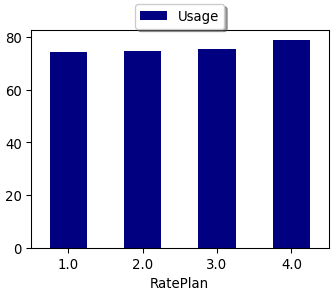

In [7]:
from pixiedust.display import *
display(data)

### Step 3: Build the Random Forest model

In [8]:
#####reference :  http://scikit-learn.org/stable/index.html

import sklearn  #scikit-learn 패키지의 장점은 다양한 머신 러닝 모형 즉, 알고리즘을 하나의 패키지에서 모두 제공하고 있음
pd.options.display.max_columns = 999

#display.max_rows and display.max_columns sets the maximum number of rows and columns displayed when a frame is pretty-printed.

import warnings #https://docs.python.org/2/library/warnings.html - Warning, UserWarning, ImportWarning
warnings.filterwarnings('ignore')

#While within the context manager all warnings will simply be ignored. This allows you to use known-deprecated code without having to see the warning while not suppressing 

from scipy.stats import chi2_contingency,ttest_ind 
      #scipy : 파이썬용 과학 관련 패키지, 각종 계산에 필요한 라이브러리, 
      #SciPy는 보통 배열이나 행렬, 정확한 숫자를 처리하기 위한 NumPy라는 패키지, 각종 플로팅에 유용하게 쓰이는 Matplotlib, Markov chain Monte Carlo용 패키지인 PyMC 같은 패키지들하고 같이 쓰는 경우가 많음       
      #http://hssuh.tistory.com/425
      #카이제곱 설명:  https://blog.naver.com/gracestock_1/120200450793  
      #t테스트/ANOVA분석 설명:   https://blog.naver.com/gracestock_1/120200100375
    
import matplotlib.pyplot as plt 
import seaborn as sns

#Seaborn is a Python visualization library based on matplotlib. It provides a high-level interface for drawing attractive statistical graphics. 

%matplotlib inline

from sklearn.cross_validation import train_test_split, StratifiedKFold
   #StratifiedKFold : 층화K폴더 - http://yamalab.tistory.com/44 http://kweonwooj.tistory.com/2
   #Stratified K-Folds cross-validator Provides train/test indices to split data in train/test sets. This cross-validation object is a variation of KFold that returns stratified folds. The folds are made by preserving the percentage of samples for each class.

from sklearn.preprocessing import MinMaxScaler, LabelEncoder

#class sklearn.preprocessing.MinMaxScaler(feature_range=(0, 1), copy=True)
#Transforms features by scaling each feature to a given range.
#This estimator scales and translates each feature individually such that it is in the given range on the training set, i.e. between zero and one.

#Encode labels with value between 0 and n_classes-1

from sklearn.ensemble import RandomForestClassifier

#A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and use averaging to improve the predictive accuracy and control over-fitting. The sub-sample size is always the same as the original input sample size but the samples are drawn with replacement if bootstrap=True (default).
#http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

from sklearn.metrics import f1_score, accuracy_score, roc_curve, roc_auc_score

#Compute the F1 score, also known as balanced F-score or F-measure
#The F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0. The relative contribution of precision and recall to the F1 score are equal. The formula for the F1 score is:
#F1 = 2 * (precision * recall) / (precision + recall)

#In multilabel classification, this function computes subset accuracy: the set of labels predicted for a sample must exactly match the corresponding set of labels in y_true.

#A receiver operating characteristic (ROC), or simply ROC curve, is a graphical plot which illustrates the performance of a binary classifier system as its discrimination threshold is varied. It is created by plotting the fraction of true positives out of the positives (TPR = true positive rate) vs. the fraction of false positives out of the negatives (FPR = false positive rate), at various threshold settings. TPR is also known as sensitivity, and FPR is one minus the specificity or true negative rate
#http://scikit-learn.org/stable/modules/model_evaluation.html#roc-metrics

#Compute Area Under the Receiver Operating Characteristic Curve (ROC AUC) from prediction scores

import numpy as np

import urllib3, requests, json

In [9]:
#convert CHURN to 1/0
le = LabelEncoder()   #from sklearn.preprocessing import MinMaxScaler, LabelEncoder
                      #Label Encoder는 독립 변수가 아닌 종속 변수(라벨)에 대해 사용한다. 문자열이나 정수로된 라벨 값을  0  ~  K−1 까지의 정수로 변환한다.
                          #https://datascienceschool.net/view-notebook/f43be7d6515b48c0beb909826993c856/
data.loc[:,'CHURN']= le.fit_transform(data.loc[:,'CHURN'])
     # dataframe loc : 라벨값 기반의 2차원 인덱싱     
data.head()

,ID_customer,Gender,Status,Children,EstIncome,CarOwner,Age,LongDistance,International,Local,Dropped,Paymethod,LocalBilltype,LongDistanceBilltype,Usage,RatePlan,ID_churn,CHURN
0,1,F,S,1.0,38000.00,N,24.393333,23.56,0.0,206.08,0.0,CC,Budget,Intnl_discount,229.64,3.0,1,1
1,6,M,M,2.0,29616.00,N,49.426667,29.78,0.0,45.50,0.0,CH,FreeLocal,Standard,75.29,2.0,6,0
2,8,M,M,0.0,19732.80,N,50.673333,24.81,0.0,22.44,0.0,CC,FreeLocal,Standard,47.25,3.0,8,0
3,11,M,S,2.0,96.33,N,56.473333,26.13,0.0,32.88,1.0,CC,Budget,Standard,59.01,1.0,11,0
4,14,F,M,2.0,52004.80,N,25.140000,5.03,0.0,23.11,0.0,CH,Budget,Intnl_discount,28.14,1.0,14,0


In [10]:
# define the label and features
y = np.float32(data.CHURN)   #datatype convert
x = data.drop(['CHURN'], axis = 1)

In [11]:
!pip install sklearn-pandas  #아래 line 에러나서 설치

In [12]:
# Apply the LabelEncoder to encode the input features in numeric form where applicable
from sklearn_pandas import DataFrameMapper

mapper = DataFrameMapper(
    [('Gender', LabelEncoder()),
     ('Status', LabelEncoder()),
     ('Children', None),
     ('EstIncome',None),
     ('CarOwner', LabelEncoder()),
     ('Age',None),
     ('LongDistance',None),
     ('International',None),
     ('Local',None),
     ('Dropped',None),
     ('Paymethod',LabelEncoder()),
     ('LocalBilltype',LabelEncoder()),
     ('LongDistanceBilltype',LabelEncoder()),
     ('Usage',None),
     ('RatePlan',None)
    ]
)

In [13]:
# split the data to training and testing set
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

In [14]:
# fit the model

import sklearn.pipeline
from sklearn.preprocessing import OneHotEncoder

random_forest = RandomForestClassifier()
steps = [('mapper', mapper),('RandonForestClassifier', random_forest)]
pipeline = sklearn.pipeline.Pipeline(steps)
model=pipeline.fit( X_train, y_train )
model

Pipeline(memory=None,
     steps=[('mapper', DataFrameMapper(default=False, df_out=False,
        features=[('Gender', LabelEncoder()), ('Status', LabelEncoder()), ('Children', None), ('EstIncome', None), ('CarOwner', LabelEncoder()), ('Age', None), ('LongDistance', None), ('International', None), ('Local', None), ('Dropped',...n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))])

In [15]:
### call pipeline.predict() on your X_test data to make a set of test predictions
y_prediction = pipeline.predict( X_test )

### test your predictions using sklearn.classification_report()

report = sklearn.metrics.classification_report( y_test, y_prediction )
### and print the report
print(report)

             precision    recall  f1-score   support

        0.0       0.98      0.99      0.98       245
        1.0       0.98      0.96      0.97       169

avg / total       0.98      0.98      0.98       414



### Step 4: Save model to ML Repository

In [16]:
# View the test data before saving
y_test_df = pd.DataFrame(y_test,columns=['CHURN'])
y_test_df.head()

,CHURN
0,0.0
1,0.0
2,0.0
3,0.0
4,1.0


In [17]:
from dsx_ml.ml import save

model_name = "Telco_Churn_SKL_model"
save(model = model, name = model_name, x_test=X_test, y_test=y_test_df, algorithm_type = 'Classification')

ImportError: No module named 'dsx_ml'

### Step 5:  Test Saved Model with Test UI
1. Save the notebook and switch to the **Models** tab of the project (**hint**: right click the project name link, DSX_Lo, at the top, and open with another tab in your browser). 
2. Under **Models**, find and click into your saved model. 
4. Click the **Test** link to test the model. 

    You can use the following data for testing: Gender=M, Status=S, Children=0, Est Income=60000, Car Owner=Y, Age=34, LongDistance=68, International=50, Local=100, Dropped=0, Paymethod=CC, LocalBilltype=Budget, LongDistanceBilltype=Standard, Usage=334, RatePlan=3

The results of the test is displayed as follows:<br/>
<img style="float: left;" src="https://github.com/yfphoon/dsx_local/blob/master/images/Test_Model.png?raw=true" alt="Test API" width=900 />

### Step 6:  Test model with a REST API call (Optional)
This step demonstrates a REST API call to test the model. Notice that we are using DSX variables for the model endpoint and token. See documentation for external REST call syntax. 

In [65]:
json_payload = [{
    "Gender":"F",
    "Status":"M",
    "Children":2.0,
    "EstIncome":77551.100000,
    "CarOwner":"Y",
    "Age":33.600000,
    "LongDistance":20.530000,
    "International":0.000000,
    "Local":41.890000,
    "Dropped":1.000000,
    "Paymethod":"CC",
    "LocalBilltype":"Budget",
    "LongDistanceBilltype":"Standard",
    "Usage":62.420000,
    "RatePlan":2.000000
}]

In [66]:
import requests, json, os
from pprint import pprint

online_path = 'https://ibm-nginx-svc.ibm-private-cloud.svc.cluster.local/v3/project/score/Python27/scikit-learn-0.19/DSX_Local_Workshop/Telco_Churn_SKL_model/1'

header_online = {'Content-Type': 'application/json', 'Authorization':os.environ['DSX_TOKEN']}

response_scoring = requests.post(online_path, json=json_payload, headers=header_online)

response_dict = json.loads(response_scoring.content)
print("Prediction")

print(response_scoring.content)

KeyError: 'DSX_TOKEN'

In [ ]:
n = 1
for response in response_dict['object']['output']['predictions']:
    print("{}. {}".format(n,response))
    n+=1

**The prediction of 1 means that the customer will churn, and 0 that they will not churn**

You have finished working on this hands-on lab.